In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clf_names = ["CART", "EBM", "GNB", "LR", "LR_l2", "DL"]
dataset_names = ['breast', 'campus', 'churn', 'climate',
            'compas', 'diabetes', 'german', 'heart',
            'adult', 'student', 'bank', 'credit']

In [33]:
clf_n = len(clf_names)
dataset_n = len(dataset_names)

In [6]:
results = []
for clf_name in clf_names:
    res_df = pd.read_csv(f"../test_results/bias_and_variance_res/{clf_name}.csv")
    results.append(res_df)

In [8]:
results[0]

,dataset_name,fold_id,bias,variance
0,breast,0,0.444810,0.036184
1,breast,1,0.435355,0.035636
2,breast,2,0.426362,0.026316
3,breast,3,0.434715,0.037007
4,breast,4,0.426982,0.043586
...,...,...,...,...
115,credit,5,0.411594,0.082933
116,credit,6,0.419094,0.087740
117,credit,7,0.412141,0.078125
118,credit,8,0.399390,0.095433


In [10]:
cart_res_df = results[0]
cart_res_df

,dataset_name,fold_id,bias,variance
0,breast,0,0.444810,0.036184
1,breast,1,0.435355,0.035636
2,breast,2,0.426362,0.026316
3,breast,3,0.434715,0.037007
4,breast,4,0.426982,0.043586
...,...,...,...,...
115,credit,5,0.411594,0.082933
116,credit,6,0.419094,0.087740
117,credit,7,0.412141,0.078125
118,credit,8,0.399390,0.095433


In [13]:
cart_res_breast_df = cart_res_df[cart_res_df["dataset_name"] == dataset_names[0]]
cart_res_breast_df

,dataset_name,fold_id,bias,variance
0,breast,0,0.444810,0.036184
1,breast,1,0.435355,0.035636
2,breast,2,0.426362,0.026316
3,breast,3,0.434715,0.037007
4,breast,4,0.426982,0.043586
5,breast,5,0.426622,0.042215
6,breast,6,0.406423,0.053180
7,breast,7,0.432378,0.025493
8,breast,8,0.446517,0.030976
9,breast,9,0.440011,0.035993


In [30]:
#bias
cart_res_breast_df.describe().iloc[1][1]
#variance
cart_res_breast_df.describe().iloc[1][2]

0.036658540883458594

In [34]:
# get bias and variance accross all datasets and clfs
results = []
for clf_name in clf_names:
    res_df = pd.read_csv(f"../test_results/bias_and_variance_res/{clf_name}.csv")
    results.append(res_df)


final_results_bias = np.zeros(shape=(clf_n, dataset_n))
final_results_var = np.zeros(shape=(clf_n, dataset_n))

for clf_id, clf_name in enumerate(clf_names):
    for dataset_id, dataset_name in enumerate(dataset_names):
        res_df = results[clf_id]
        res_dataset_df = res_df[cart_res_df["dataset_name"] == dataset_name]
        final_results_bias[clf_id, dataset_id] = res_dataset_df.describe().iloc[1][1]
        final_results_var[clf_id, dataset_id] = res_dataset_df.describe().iloc[1][2]  
        

## 1. Bias

In [41]:
pd.DataFrame(final_results_bias.T)

,0,1,2,3,4,5
0,0.432018,0.448703,0.459007,0.450229,0.458147,0.458194
1,0.325181,0.356415,0.343248,0.375201,0.384692,0.307816
2,0.238898,0.267578,0.279832,0.241204,0.241014,0.264432
3,0.104769,0.090663,0.100136,0.132623,0.114737,0.085180
4,0.345948,0.356622,0.368893,0.360766,0.360872,0.381558
5,0.332479,0.384779,0.413028,0.408814,0.408326,0.402664
6,0.281236,0.313688,0.432928,0.336917,0.337646,0.299767
7,0.369794,0.448843,0.469796,0.457752,0.460663,0.444583
8,0.290401,0.330832,0.597475,0.335974,0.336086,0.325242
9,0.313508,0.366424,0.403132,0.375882,0.384692,0.446036


In [43]:
from scipy.stats import rankdata
ranks_bias = []
for mr in final_results_bias.T:
    ranks_bias.append(rankdata(mr).tolist())
ranks_bias = np.array(ranks_bias)
print("\nRanks:\n", ranks_bias)


Ranks:
 [[1. 2. 6. 3. 4. 5.]
 [2. 4. 3. 5. 6. 1.]
 [1. 5. 6. 3. 2. 4.]
 [4. 2. 3. 6. 5. 1.]
 [1. 2. 5. 3. 4. 6.]
 [1. 2. 6. 5. 4. 3.]
 [1. 3. 6. 4. 5. 2.]
 [1. 3. 6. 4. 5. 2.]
 [1. 3. 6. 4. 5. 2.]
 [1. 2. 5. 3. 4. 6.]
 [1. 4. 6. 3. 2. 5.]
 [2. 4. 1. 3. 5. 6.]]


In [44]:
mean_ranks_bias = np.mean(ranks_bias, axis=0)
mean_ranks_bias

array([1.41666667, 3.        , 4.91666667, 3.83333333, 4.25      ,
       3.58333333])

In [57]:
from scipy.stats import rankdata
rankdata(mean_ranks_bias)

array([1., 2., 6., 4., 5., 3.])

## 2. Variance

In [45]:
pd.DataFrame(final_results_var.T)

,0,1,2,3,4,5
0,0.036659,0.015343,0.005778,0.016472,0.006089,0.026268
1,0.100954,0.050947,0.090162,0.041596,0.026329,0.006463
2,0.089828,0.011833,0.007487,0.005375,0.005372,0.019919
3,0.049595,0.010503,0.013281,0.024219,0.013281,0.000203
4,0.073986,0.026350,0.103126,0.023220,0.023015,0.044587
5,0.123172,0.049989,0.030000,0.023913,0.023708,0.095025
6,0.141152,0.065782,0.117268,0.063839,0.056164,0.000985
7,0.126342,0.047659,0.028904,0.037830,0.034373,0.067160
8,0.078278,0.013123,0.029220,0.007567,0.006880,0.005057
9,0.182727,0.122735,0.084606,0.118789,0.108997,0.008105


In [46]:
from scipy.stats import rankdata
ranks_var = []
for mr in final_results_var.T:
    ranks_var.append(rankdata(mr).tolist())
ranks_var = np.array(ranks_var)
print("\nRanks:\n", ranks_var)


Ranks:
 [[6. 3. 1. 4. 2. 5.]
 [6. 4. 5. 3. 2. 1.]
 [6. 4. 3. 2. 1. 5.]
 [6. 2. 3. 5. 4. 1.]
 [5. 3. 6. 2. 1. 4.]
 [6. 4. 3. 2. 1. 5.]
 [6. 4. 5. 3. 2. 1.]
 [6. 4. 1. 3. 2. 5.]
 [6. 4. 5. 3. 2. 1.]
 [6. 5. 2. 4. 3. 1.]
 [6. 5. 4. 2. 1. 3.]
 [6. 3. 5. 4. 2. 1.]]


In [47]:
mean_ranks_var = np.mean(ranks_var, axis=0)
mean_ranks_var

array([5.91666667, 3.75      , 3.58333333, 3.08333333, 1.91666667,
       2.75      ])

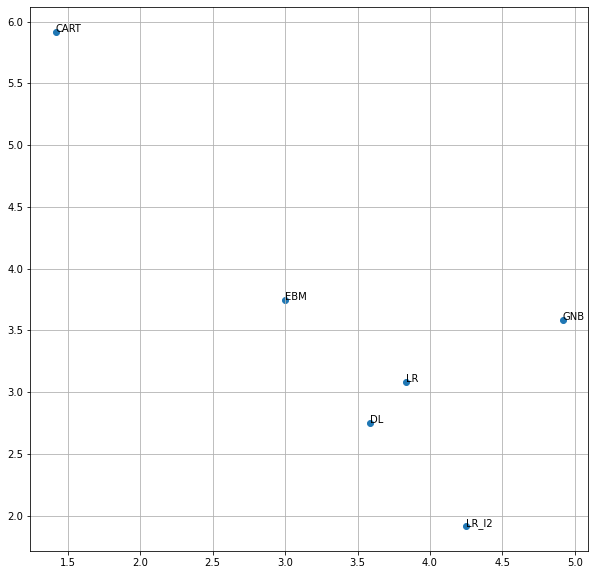

In [56]:
plt.figure(figsize=(10, 10))
plt.scatter(mean_ranks_bias, mean_ranks_var)
plt.grid(True)

for clf_id, clf_name in enumerate(clf_names):
    plt.annotate(clf_name, (mean_ranks_bias[clf_id], mean_ranks_var[clf_id]))

In [58]:
from scipy.stats import ranksums

alfa = .05
w_statistic = np.zeros((len(clf_names), len(clf_names)))
p_value = np.zeros((len(clf_names), len(clf_names)))

for i in range(len(clf_names)):
    for j in range(len(clf_names)):
        w_statistic[i, j], p_value[i, j] = ranksums(ranks_bias.T[i], ranks_bias.T[j])

In [59]:
from tabulate import tabulate

headers = clf_names
names_column = np.expand_dims(np.array(clf_names), axis=1)
w_statistic_table = np.concatenate((names_column, w_statistic), axis=1)
w_statistic_table = tabulate(w_statistic_table, headers, floatfmt=".2f")
p_value_table = np.concatenate((names_column, p_value), axis=1)
p_value_table = tabulate(p_value_table, headers, floatfmt=".2f")
print("\nw-statistic:\n", w_statistic_table, "\n\np-value:\n", p_value_table)


w-statistic:
          CART    EBM    GNB     LR    LR_l2     DL
-----  ------  -----  -----  -----  -------  -----
CART     0.00  -3.32  -3.61  -3.72    -3.81  -2.86
EBM      3.32   0.00  -2.77  -1.76    -2.34  -0.61
GNB      3.61   2.77   0.00   1.99     1.70   1.70
LR       3.72   1.76  -1.99   0.00    -1.13   0.40
LR_l2    3.81   2.34  -1.70   1.13     0.00   0.66
DL       2.86   0.61  -1.70  -0.40    -0.66   0.00 

p-value:
          CART    EBM    GNB    LR    LR_l2    DL
-----  ------  -----  -----  ----  -------  ----
CART     1.00   0.00   0.00  0.00     0.00  0.00
EBM      0.00   1.00   0.01  0.08     0.02  0.54
GNB      0.00   0.01   1.00  0.05     0.09  0.09
LR       0.00   0.08   0.05  1.00     0.26  0.69
LR_l2    0.00   0.02   0.09  0.26     1.00  0.51
DL       0.00   0.54   0.09  0.69     0.51  1.00


In [60]:
advantage = np.zeros((len(clf_names), len(clf_names)))
advantage[w_statistic > 0] = 1
advantage_table = tabulate(np.concatenate(
    (names_column, advantage), axis=1), headers)
print("\nAdvantage:\n", advantage_table)


Advantage:
          CART    EBM    GNB    LR    LR_l2    DL
-----  ------  -----  -----  ----  -------  ----
CART        0      0      0     0        0     0
EBM         1      0      0     0        0     0
GNB         1      1      0     1        1     1
LR          1      1      0     0        0     1
LR_l2       1      1      0     1        0     1
DL          1      1      0     0        0     0


In [61]:
significance = np.zeros((len(clf_names), len(clf_names)))
significance[p_value <= alfa] = 1
significance_table = tabulate(np.concatenate(
    (names_column, significance), axis=1), headers)
print("\nStatistical significance (alpha = 0.05):\n", significance_table)


Statistical significance (alpha = 0.05):
          CART    EBM    GNB    LR    LR_l2    DL
-----  ------  -----  -----  ----  -------  ----
CART        0      1      1     1        1     1
EBM         1      0      1     0        1     0
GNB         1      1      0     1        0     0
LR          1      0      1     0        0     0
LR_l2       1      1      0     0        0     0
DL          1      0      0     0        0     0


In [62]:
stat_better = significance * advantage
stat_better_table = tabulate(np.concatenate(
    (names_column, stat_better), axis=1), headers)
print("Statistically significantly better:\n", stat_better_table)

Statistically significantly better:
          CART    EBM    GNB    LR    LR_l2    DL
-----  ------  -----  -----  ----  -------  ----
CART        0      0      0     0        0     0
EBM         1      0      0     0        0     0
GNB         1      1      0     1        0     0
LR          1      0      0     0        0     0
LR_l2       1      1      0     0        0     0
DL          1      0      0     0        0     0
